# Homework 4

``` MGMT 300 - Natalya Nalbandyan ```

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

---

## Problem 1


In [2]:
data = pd.read_excel('Wine_data.xlsx')

___

## Problem 2

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Last Name  324 non-null    object 
 1   Offer N             324 non-null    int64  
 2   Gender              324 non-null    object 
 3   Discount            324 non-null    int64  
 4   Varietal            323 non-null    object 
 5   Customer_Segment    324 non-null    object 
 6   Minimum Qty (kg)    323 non-null    float64
 7   Origin              324 non-null    object 
 8   Campaign            324 non-null    object 
 9   Past Peak           322 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 25.4+ KB


There are 3 numeric variables and 7 non-numeric variables. Out of numeric variables, 2 variables are integer type and 1 variable is float type. 

___

## Problem 3

In [4]:
data.isna().sum()

Customer Last Name    0
Offer N               0
Gender                0
Discount              0
Varietal              1
Customer_Segment      0
Minimum Qty (kg)      1
Origin                0
Campaign              0
Past Peak             2
dtype: int64

There are 3 variables which contain missing values: Varietal, Minimum Qty (kg) and Past Peak

There are respectively 1 missing value for Varietal and Minumum Qty variables, and 2 missing values for Past Peak variable. 

___

## Problem 4

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Last Name  324 non-null    object 
 1   Offer N             324 non-null    int64  
 2   Gender              324 non-null    object 
 3   Discount            324 non-null    int64  
 4   Varietal            323 non-null    object 
 5   Customer_Segment    324 non-null    object 
 6   Minimum Qty (kg)    323 non-null    float64
 7   Origin              324 non-null    object 
 8   Campaign            324 non-null    object 
 9   Past Peak           322 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 25.4+ KB


For Minimum Qty (float)replacing missing values with a median of the column. 
For the other object variables, dropping missing values

In [6]:
data['Minimum Qty (kg)'].median()

72.0

In [7]:
data['Minimum Qty (kg)']= data['Minimum Qty (kg)'].fillna(data['Minimum Qty (kg)'].median())
data.isna().sum()

Customer Last Name    0
Offer N               0
Gender                0
Discount              0
Varietal              1
Customer_Segment      0
Minimum Qty (kg)      0
Origin                0
Campaign              0
Past Peak             2
dtype: int64

In [8]:
data.dropna(inplace = True)
data.isna().sum()


Customer Last Name    0
Offer N               0
Gender                0
Discount              0
Varietal              0
Customer_Segment      0
Minimum Qty (kg)      0
Origin                0
Campaign              0
Past Peak             0
dtype: int64

---

## Problem 5

In [9]:
columns_new = []
for i in data.columns:
    columns_new.append(i.replace(' ','_').replace('(','_').replace(')','').replace('__','_'))
print(columns_new)

['Customer_Last_Name', 'Offer_N', 'Gender', 'Discount', 'Varietal', 'Customer_Segment', 'Minimum_Qty_kg', 'Origin', 'Campaign', 'Past_Peak']


In [10]:
data.columns = columns_new

In [11]:
data.columns

Index(['Customer_Last_Name', 'Offer_N', 'Gender', 'Discount', 'Varietal',
       'Customer_Segment', 'Minimum_Qty_kg', 'Origin', 'Campaign',
       'Past_Peak'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_Last_Name  321 non-null    object 
 1   Offer_N             321 non-null    int64  
 2   Gender              321 non-null    object 
 3   Discount            321 non-null    int64  
 4   Varietal            321 non-null    object 
 5   Customer_Segment    321 non-null    object 
 6   Minimum_Qty_kg      321 non-null    float64
 7   Origin              321 non-null    object 
 8   Campaign            321 non-null    object 
 9   Past_Peak           321 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 27.6+ KB


---

## Problem 6

In [13]:
print("Average discount is {}%".format(np.mean(data['Discount'])))
print("Average standard deviation is {}".format(np.std(data['Discount'])))

Average discount is 59.517133956386296%
Average standard deviation is 20.281366289702248


In [14]:
print('Average mimimum quantity is {} kg'.format(np.mean(data['Minimum_Qty_kg'])))

Average mimimum quantity is 58.691588785046726 kg


In [15]:
print('Median mimimum quantity is {} kg'.format(np.median(data['Minimum_Qty_kg'])))

Median mimimum quantity is 72.0 kg


In [16]:
print('66 percentile of minimum quantity is {} kg'.format(np.percentile(data['Minimum_Qty_kg'],66)))

66 percentile of minimum quantity is 72.0 kg


In [17]:
print('79 percentile of discount is {}%'.format(np.percentile(data['Discount'],79)))

79 percentile of discount is 85.0%


---

## Problem 7

In [18]:
data.reset_index(inplace=True)

In [19]:
for i in ['Gender', 'Varietal', 'Customer_Segment','Origin']:
    print('\n',i,'\n','------------------------------------')
    print(data[i].value_counts())


 Gender 
 ------------------------------------
Male      161
Female    160
Name: Gender, dtype: int64

 Varietal 
 ------------------------------------
Champagne             79
Pinot Noir            43
Prosecco              43
Espumante             40
Malbec                32
Cabernet Sauvignon    32
Merlot                20
Pinot Grigio          17
Chardonnay            15
Name: Varietal, dtype: int64

 Customer_Segment 
 ------------------------------------
Segment 1    124
Segment 2     94
Segment 3     73
Segment 4     30
Name: Customer_Segment, dtype: int64

 Origin 
 ------------------------------------
France          126
Australia        39
Chile            37
Oregon           26
South Africa     25
Italy            23
California       16
Germany          16
New Zealand      13
Name: Origin, dtype: int64


## Problem 8

In [20]:
data_num=data.iloc[:,2:].select_dtypes(exclude='object')

In [21]:
data_num.head()

,Offer_N,Discount,Minimum_Qty_kg
0,2,17,72.0
1,24,34,6.0
2,17,47,12.0
3,24,34,6.0
4,26,83,144.0


/Users/natalyanalbandyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


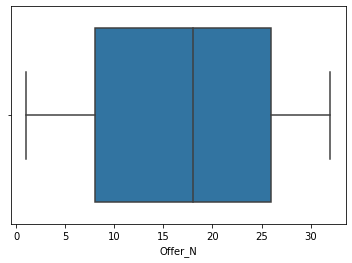

/Users/natalyanalbandyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


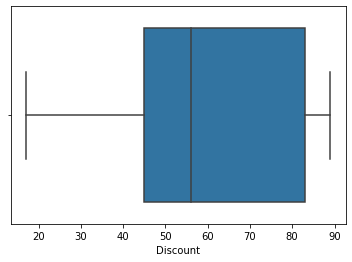

/Users/natalyanalbandyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


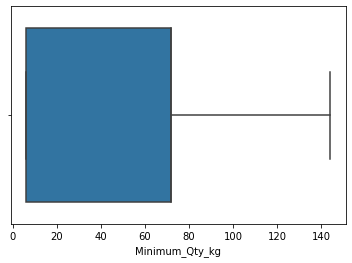

In [22]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

/Users/natalyanalbandyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


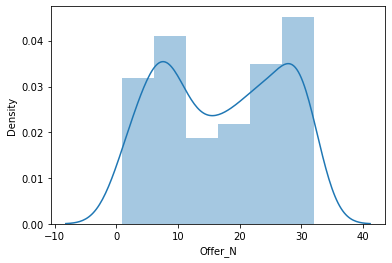

/Users/natalyanalbandyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


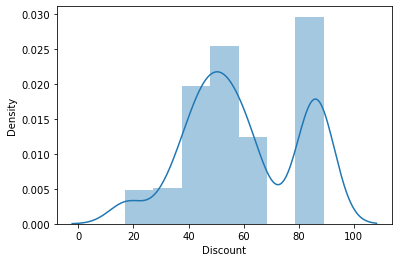

/Users/natalyanalbandyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


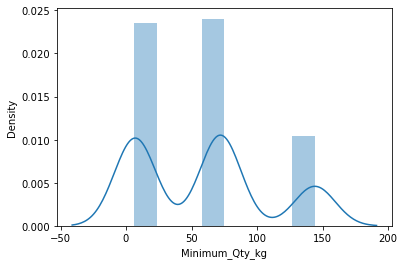

In [23]:
for i in data_num.columns:
    sns.distplot(data_num[i])
    plt.show()

- Above we can see distribution for the 3 numeric variables which are (Offer number, discount and Minimum quantity)(Index is excluded as well).
- Discoun range is within %18-90 range, the distribution being left skewed. 
- Minumum order quantity is in a range aroung 5-140 kg, the distribution being right skewed.

## Problem 9

In [24]:
#a. Relationship between “Gender” and “Minimum Qty (kg)”

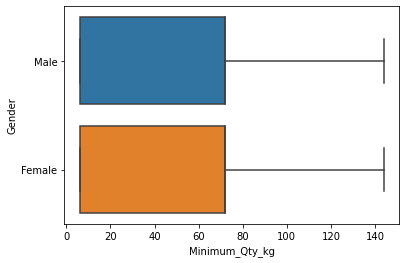

In [25]:
sns.boxplot(y=data.Gender,x=data.Minimum_Qty_kg,orient='h')

plt.show()

Minimum order quantity distribution is more or less the same for both genders. 

In [26]:
#b. Relationship between “Origin” and “Minimum Qty (kg)”

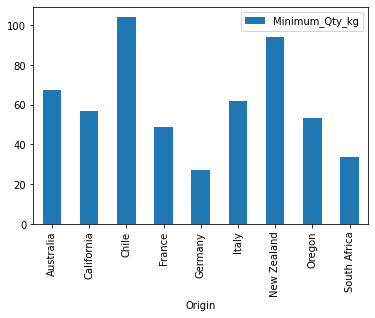

In [27]:
data[['Origin','Minimum_Qty_kg']].groupby('Origin').mean().plot(kind='bar')
plt.show()

- Minimum Order Quantity is comparatively high for some Origin countries (Chile, New  Zealand) and also comparatively low for some other countries (Germany, France, South Africa). 
- There is a significant relationship between origin and minimum order quantity

In [28]:
#c. Relationship between “Minimum Qty (kg)” and “Discount”

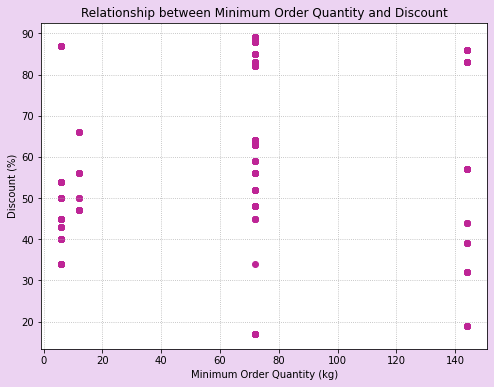

In [29]:
plt.figure(figsize=(8,6), facecolor="#ecd3f2") 
plt.scatter(data.Minimum_Qty_kg,
            data.Discount,
            color="#be2596")
plt.title("Relationship between Minimum Order Quantity and Discount")
plt.xlabel("Minimum Order Quantity (kg)")
plt.ylabel("Discount (%)")
plt.grid(b=True,
         linestyle=':' 
)
plt.show()

- There is no significant relationship between Minimum Order Quanity and Discount

In [30]:
#d. Relationship between “Varietal” and “Origin”

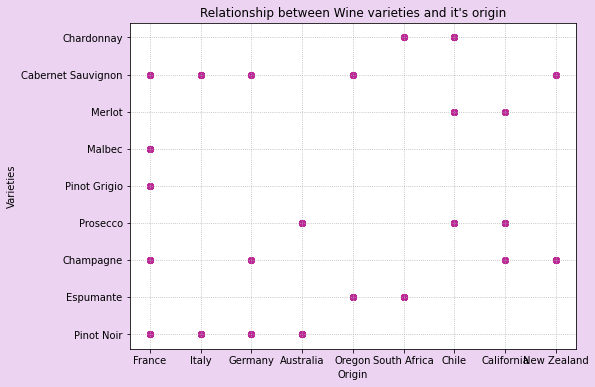

In [31]:
plt.figure(figsize=(8,6), facecolor="#ecd3f2") 
plt.scatter(data.Origin,
            data.Varietal,
            color="#be2596")
plt.title("Relationship between Wine varieties and it's origin")
plt.xlabel("Origin")
plt.ylabel("Varieties")
plt.grid(b=True,
         linestyle=':' 
)
plt.show()

- There is a relationship between Wine variety and it's origin. In particular from the Scatter Plot it can be seen the varieties by origin (and vice versa). 

In [32]:
#e. Correlation between all numeric variables in the data

<AxesSubplot:>

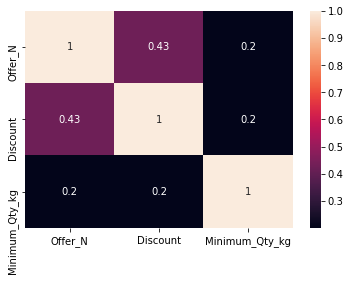

In [33]:
sns.heatmap(data_num.corr().abs(),annot=True)


- There is a high corerlation (0.43) between discount and Offer Number

## Problem 10

*Difference between female and male wine buyers in terms of average “Minimum Qty (kg)” bought*

In [34]:
ttest_ind(data['Minimum_Qty_kg'][data['Gender']=='Female'],
          data['Minimum_Qty_kg'][data['Gender']=='Male']
)

Ttest_indResult(statistic=0.11940445515514647, pvalue=0.9050300923363799)

In [35]:
data[['Gender','Minimum_Qty_kg']].groupby('Gender').mean()


,Minimum_Qty_kg
Gender,
Female,59.025000
Male,58.360248


There is no significant difference for minimum order quantity in terms of gender. p-value is 0.9 is much higher than 0.05

## Premium Question

In [36]:
def discount(i):
    """i is each value in column"""
    if i<np.percentile(data.Discount,50):
        output='less than 50%'
    elif i>=np.percentile(data.Discount,50) and i<=np.percentile(data.Discount,70):
        output='from 50% to 70%'
    else:
        output='more than 70%'
    return output

In [37]:
data.head()

,index,Customer_Last_Name,Offer_N,Gender,Discount,Varietal,Customer_Segment,Minimum_Qty_kg,Origin,Campaign,Past_Peak
0,0,Smith,2,Male,17,Pinot Noir,Segment 4,72.0,France,January,False
1,1,Smith,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
2,2,Johnson,17,Male,47,Pinot Noir,Segment 4,12.0,Germany,July,False
3,3,Johnson,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
4,4,Johnson,26,Male,83,Pinot Noir,Segment 4,144.0,Australia,October,False


In [38]:
data.drop('index',axis=1,inplace=True)
data.head()

,Customer_Last_Name,Offer_N,Gender,Discount,Varietal,Customer_Segment,Minimum_Qty_kg,Origin,Campaign,Past_Peak
0,Smith,2,Male,17,Pinot Noir,Segment 4,72.0,France,January,False
1,Smith,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12.0,Germany,July,False
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144.0,Australia,October,False


In [39]:
discount_values=[]
for i in range(len(data.Discount)):
    discount_values.append(discount(data.Discount[i]))
discount_values

['less than 50%',
 'less than 50%',
 'less than 50%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'from 50% to 70%',
 'more than 70%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'from 50% to 70%',
 'less than 50%',
 'from 50% to 70%',
 'less than 50%',
 'more than 70%',
 'more than 70%',
 'from 50% to 70%',
 'from 50% to 70%',
 'from 50% to 70%',
 'less than 50%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'less than 50%',
 'more than 70%',
 'from 50% to 70%',
 'from 50% to 70%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'from 50% to 70%',
 'from 50% to 70%',
 'from 50% to 70%',
 'more than 70%',
 'from 50% to 70%',
 'more than 70%',
 'less than 50%',
 'less than 50%',
 'more than 70%',
 'from 50% to 70%',
 'from 50% to 70%',
 'less than 50%',
 'more than 70%',
 'less than 50%',
 'from 50% to 70%',
 'from 50% to 70%',
 'more than 70

In [40]:
data['Discount_Coded']= discount_values
data.head()

,Customer_Last_Name,Offer_N,Gender,Discount,Varietal,Customer_Segment,Minimum_Qty_kg,Origin,Campaign,Past_Peak,Discount_Coded
0,Smith,2,Male,17,Pinot Noir,Segment 4,72.0,France,January,False,less than 50%
1,Smith,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False,less than 50%
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12.0,Germany,July,False,less than 50%
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6.0,Italy,September,False,less than 50%
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144.0,Australia,October,False,more than 70%


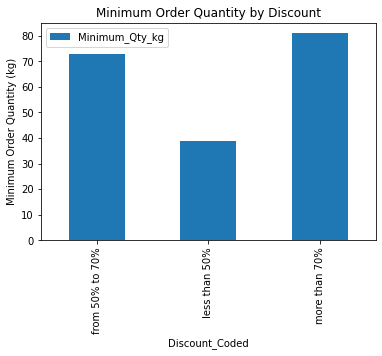

In [41]:

data[['Discount_Coded','Minimum_Qty_kg']].groupby('Discount_Coded').mean().plot(kind='bar')

plt.title('Minimum Order Quantity by Discount')
plt.ylabel('Minimum Order Quantity (kg)')

plt.show()